<a href="https://colab.research.google.com/github/prcstak/service_text_recognition/blob/main/notebooks/segmentation_with_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Attempted to remove small artefacts

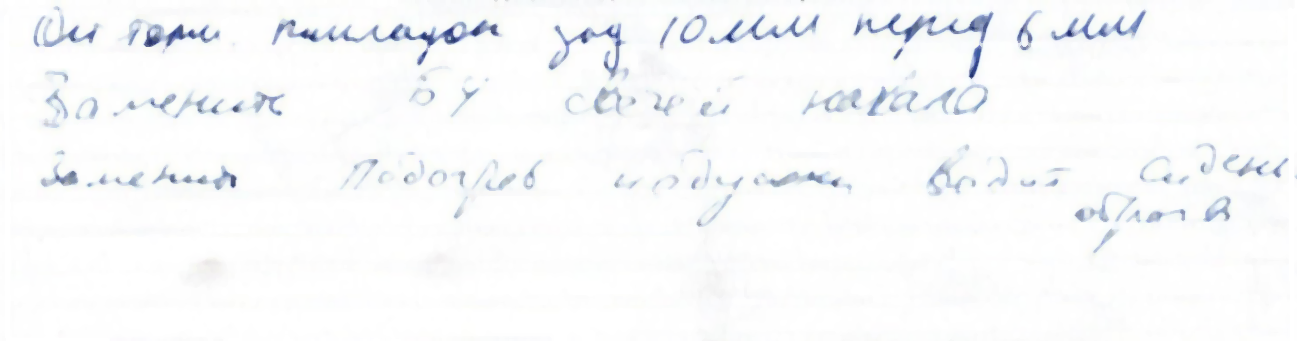

In [111]:
image = cv2.imread("/content/download.png")
blurred_img = cv2.medianBlur(image, 5)

kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(blurred_img, kernel, iterations=1)
output = cv2.dilate(erosion, kernel, iterations=1)
cv2_imshow(output)

# Line segmentation
> *PS* failed

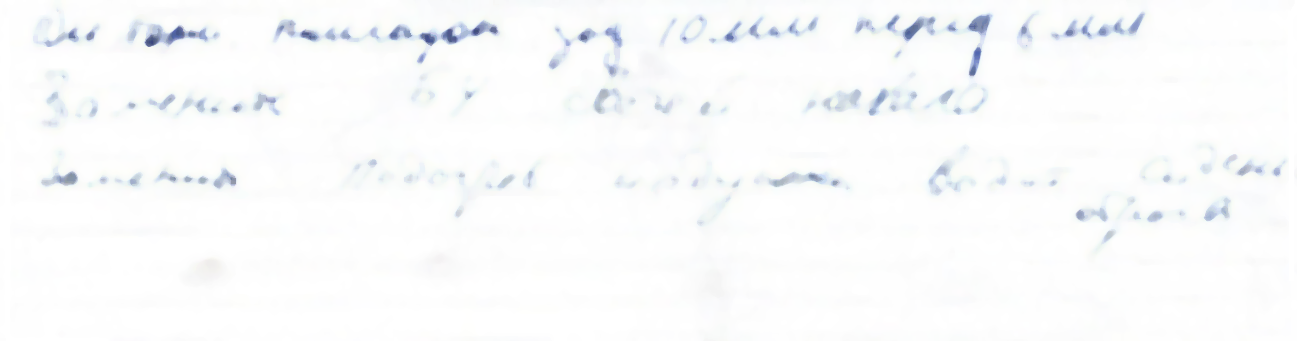

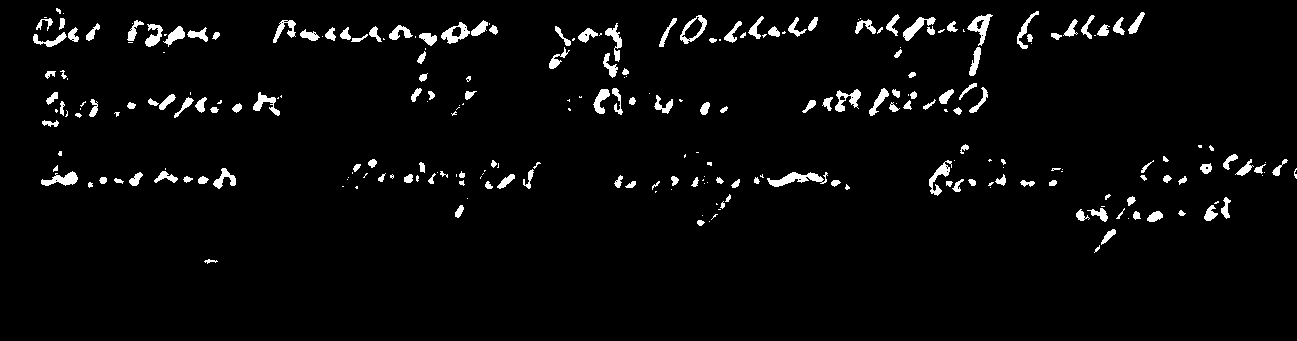

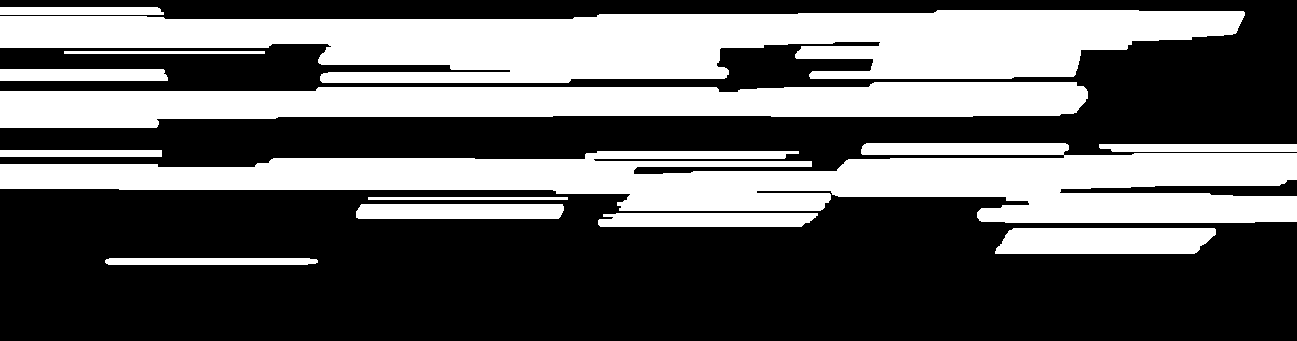

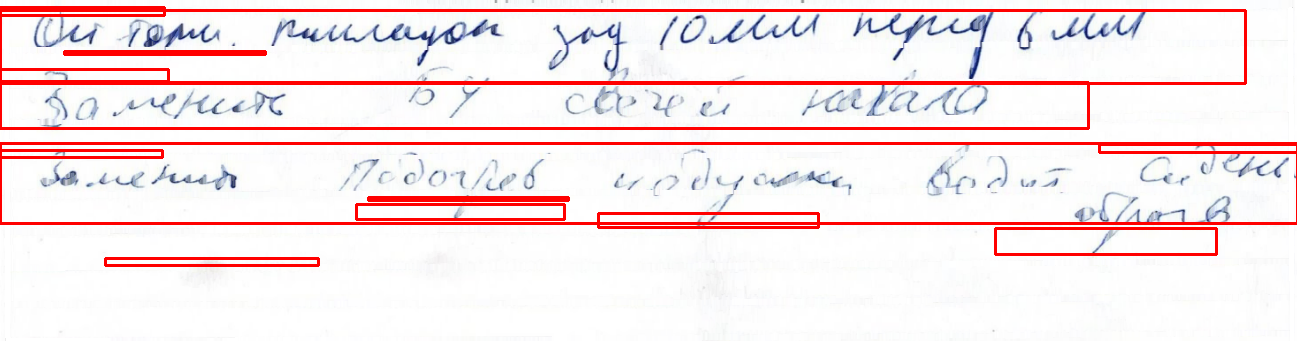

In [108]:
img = output
cv2_imshow(img)

# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold the grayscale image
#thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 9, 3)
cv2_imshow(thresh)
# use morphology erode to blur horizontally

# kernel = np.ones((3,3),np.uint8)
# erosion = cv2.erode(thresh, kernel, iterations = 1)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (200, 3))
morph = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, kernel)
cv2_imshow(morph)
#kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
#morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)
#cv2_imshow(morph)


# find contours
cntrs = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]

# Draw contours
result = image.copy()
for c in cntrs:
  #area = cv2.contourArea(c)
  #if area > 300:
  x,y,w,h = cv2.boundingRect(c)
  cv2.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 2)

cv2_imshow(result)

# words segmentation

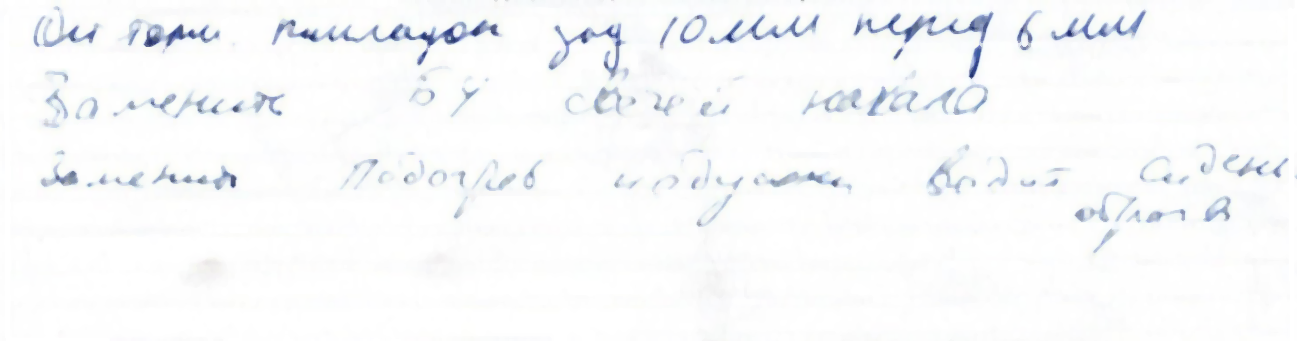

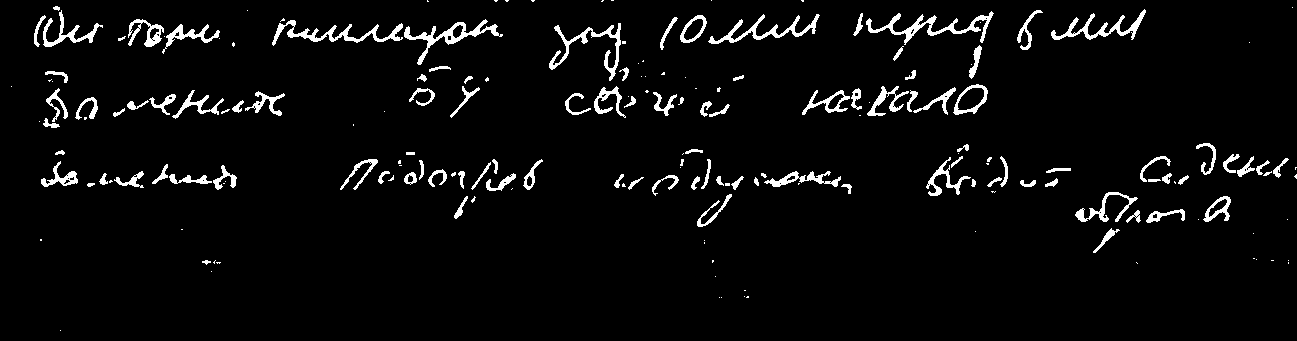

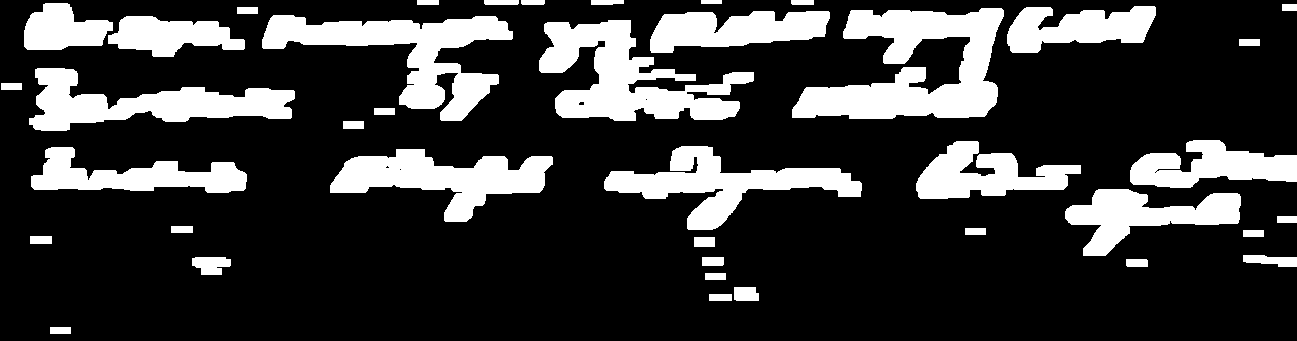

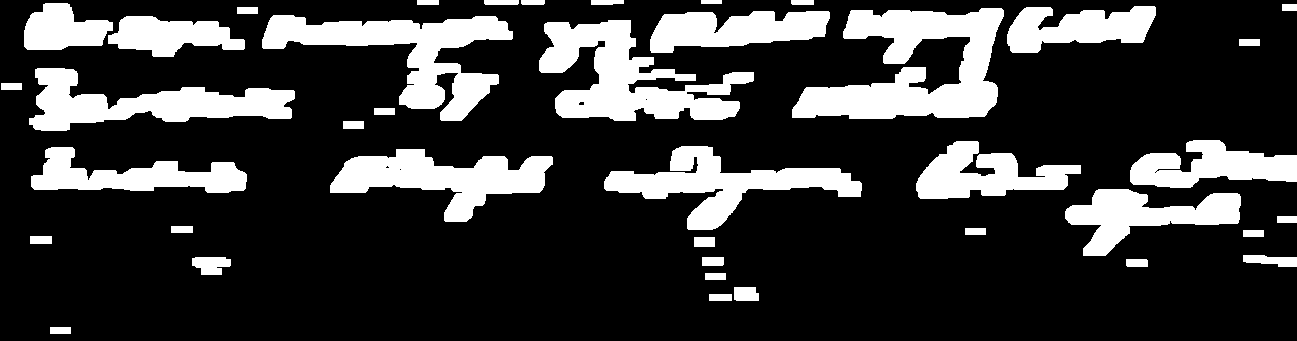

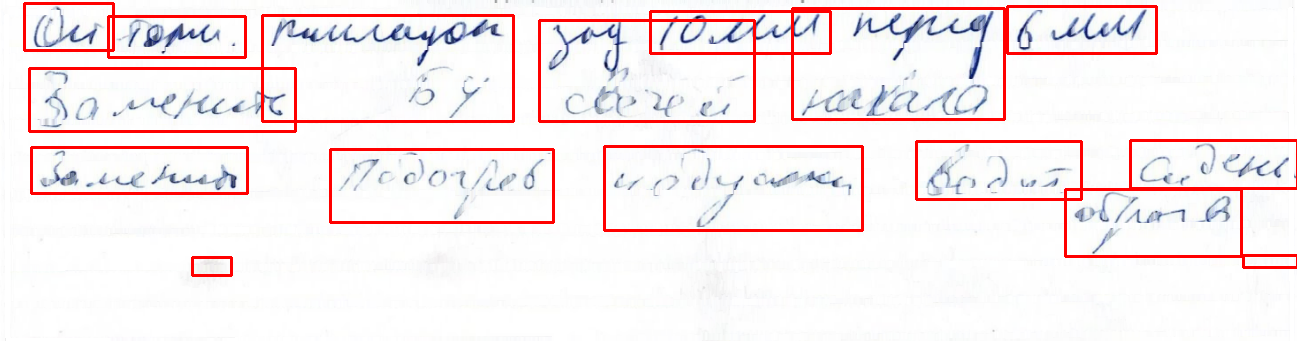

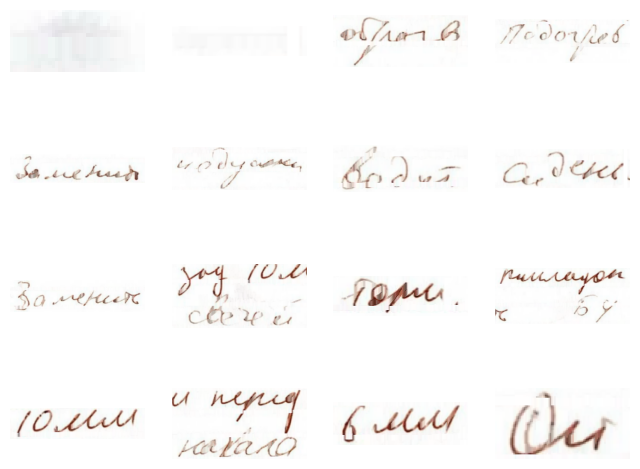

In [134]:

# load image
img = output
cv2_imshow(img)

# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold the grayscale image
# thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 7, 3)
cv2_imshow(thresh)
# use morphology erode to blur horizontally

# kernel = np.ones((3,3),np.uint8)
# erosion = cv2.erode(thresh, kernel, iterations = 1)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
morph = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, kernel)
cv2_imshow(morph)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)
cv2_imshow(morph)

# find contours
cntrs = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]

# Draw contours
result = image.copy()
bboxes = []
for c in cntrs:
  area = cv2.contourArea(c)
  if area > 350:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 2)
    bboxes.append((x,y,w,h))

cv2_imshow(result)

fig = plt.figure(figsize=(8, 8))
columns = 4
rows = len(bboxes)//4+1
i = 1
for b in bboxes:
  x, y, w, h = b
  cropped_image = image[y:y+h, x:x+w]
  fig.add_subplot(rows, columns, i)
  plt.axis('off')
  plt.imshow(cropped_image)
  i+=1

plt.show()

# write result to disk
#cv2.imwrite("test_text_threshold.png", thresh)
#cv2.imwrite("test_text_morph.png", morph)
#cv2.imwrite("test_text_lines.jpg", result)